In [73]:
import matplotlib.pyplot as plt
import tensorflow as tf
#import cv2
import imghdr
import h5py

%matplotlib inline

In [74]:
# 읽기 모드로 파일 열기
with h5py.File('data/train_catvnoncat.h5', 'r') as f:
    # 데이터셋 로드
    train={}
    for k in f.keys():
        train[k] = f[k][:]
    #train = f['my_dataset'][:]
    print(train)
with h5py.File('data/test_catvnoncat.h5', 'r') as f:
    # 데이터셋 로드
    test ={}
    for k in f.keys():
        test[k] = f[k][:]
    print(test)

{'list_classes': array([b'non-cat', b'cat'], dtype='|S7'), 'train_set_x': array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],


In [97]:
print(train.keys())

dict_keys(['list_classes', 'train_set_x', 'train_set_y'])


In [88]:
imgs = []
for i in range(4):
    img = Image.fromarray(dset[i].astype("uint8"), "RGB")
    imgs.append(img)

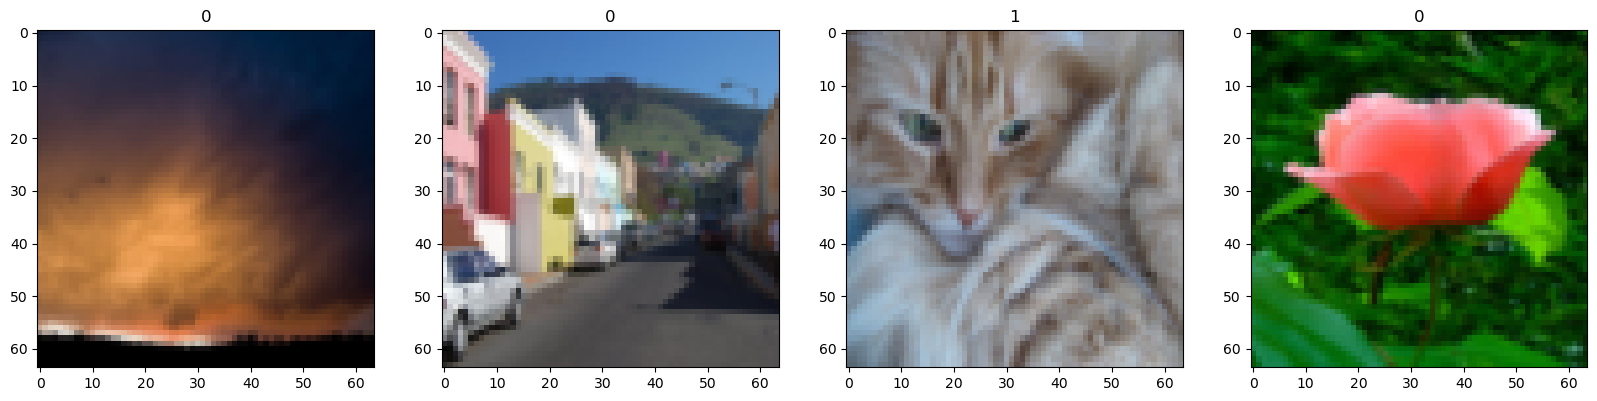

In [107]:
from PIL import Image
import numpy as np
dset = train['train_set_x'][:4]
labels = train['train_set_y'][:4]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
for idx, (img, label) in enumerate(zip(imgs, labels)):
    ax[idx].imshow(img)
    ax[idx].title.set_text(label)
plt.show()

In [120]:
train['train_set_x'] = train['train_set_x']/255
test['test_set_x'] = test['test_set_x']/255

In [121]:
train['train_set_x']

array([[[[0.06666667, 0.12156863, 0.21960784],
         [0.08627451, 0.12941176, 0.23137255],
         [0.09803922, 0.1372549 , 0.24313725],
         ...,
         [0.00392157, 0.10980392, 0.22352941],
         [0.00392157, 0.10196078, 0.21960784],
         [0.00392157, 0.08627451, 0.2       ]],

        [[0.09803922, 0.14117647, 0.24313725],
         [0.10980392, 0.14901961, 0.25098039],
         [0.11764706, 0.15686275, 0.2627451 ],
         ...,
         [0.00392157, 0.10588235, 0.21960784],
         [0.00392157, 0.09803922, 0.21568627],
         [0.00784314, 0.08235294, 0.2       ]],

        [[0.1254902 , 0.15686275, 0.2627451 ],
         [0.13333333, 0.16470588, 0.27058824],
         [0.1372549 , 0.16470588, 0.2745098 ],
         ...,
         [0.00392157, 0.09803922, 0.21568627],
         [0.        , 0.09411765, 0.21176471],
         [0.00392157, 0.08235294, 0.2       ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [123]:
model = Sequential([
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=SGD(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [124]:
# EarlyStopping 콜백 추가
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [125]:
## SGD

hist = model.fit(train['train_set_x'], train['train_set_y'], epochs=50, callbacks=[early_stopping], validation_split=0.2)
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4728 - loss: 0.8450 - val_accuracy: 0.7143 - val_loss: 0.6540
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6922 - loss: 0.6346 - val_accuracy: 0.5952 - val_loss: 0.6880
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5915 - loss: 0.6821 - val_accuracy: 0.3333 - val_loss: 0.7620
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5540 - loss: 0.6833 - val_accuracy: 0.5952 - val_loss: 0.6870
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6099 - loss: 0.6636 - val_accuracy: 0.7143 - val_loss: 0.6491
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6387 - loss: 0.6561 - val_accuracy: 0.6905 - val_loss: 0.6380
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6010 - loss: 0.6462 - val_accuracy: 0.7143 - val_loss: 0.6529
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6522 - loss: 0.6622 - val_accuracy: 0.3810 - val_loss: 0.7476


In [126]:
model.predict(train['train_set_x'][:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.39039192],
       [0.2760691 ],
       [0.36851507],
       [0.25389224]], dtype=float32)

In [127]:
train['train_set_y']

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
(model.predict(test['test_set_x'])>=0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [129]:
result=model.evaluate(test['test_set_x'], test['test_set_y'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3575 - loss: 0.8383


In [132]:
# 1.5 TFLite로 변환
def convert_to_tflite(model, filename='logistic.tflite'):
    # TFLite 변환기 생성
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # 양자화 적용 (모바일 기기에서 더 효율적으로 실행하기 위해)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # 변환 실행
    tflite_model = converter.convert()

    # 파일로 저장
    with open(filename, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite 모델이 {filename}에 저장되었습니다.")
    return filename

In [131]:
# 1.5 TFLite로 변환
def convert_to_tflite(model, filename='logistic_optim.tflite'):
    # TFLite 변환기 생성
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # 양자화 적용 (모바일 기기에서 더 효율적으로 실행하기 위해)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # 변환 실행
    tflite_model = converter.convert()

    # 파일로 저장
    with open(filename, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite 모델이 {filename}에 저장되었습니다.")
    return filename

In [133]:
filename = convert_to_tflite(model, filename='logistic__optim.tflite')

INFO:tensorflow:Assets written to: /tmp/tmptqaofe45/assets


INFO:tensorflow:Assets written to: /tmp/tmptqaofe45/assets


Saved artifact at '/tmp/tmptqaofe45'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139216462426384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139216462172000: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite 모델이 logistic__optim.tflite에 저장되었습니다.


W0000 00:00:1749533189.614417    7881 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749533189.614428    7881 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-10 14:26:29.614525: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmptqaofe45
2025-06-10 14:26:29.614720: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-10 14:26:29.614725: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmptqaofe45
2025-06-10 14:26:29.615837: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-10 14:26:29.622861: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmptqaofe45
2025-06-10 14:26:29.626159: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 11635 microseconds.
